In [1]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('../data/animelists_reduced.csv', usecols = ['username', 'anime_id','my_score'])

In [5]:
df.head(3)

,username,anime_id,my_score
0,karthiga,21,9
1,karthiga,59,7
2,karthiga,74,7


In [6]:
df['username'].nunique()

107016

In [7]:
df.shape

(31248594, 3)

In [8]:
df['anime_id'].nunique()

5853

In [9]:
from matplotlib import pyplot as plt
plt.hist(df['my_score'])
plt.show()

<Figure size 640x480 with 1 Axes>

In [10]:
df = df[df['my_score'] < 11 ]
df = df[df['my_score'] >= 0]
df['my_score'] = df['my_score'] + 1

In [11]:
## Converting user_id and item_id to codes
df.username = df.username.astype('category').cat.codes.values
df.anime_id = df.anime_id.astype('category').cat.codes.values

In [12]:
df.head(3)

,username,anime_id,my_score
0,85752,11,10
1,85752,40,8
2,85752,54,8


In [13]:
#df = df.reset_index()

#df.pop('index')
#df = df[df.index < 2000]

In [14]:
df.shape

(31248594, 3)

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state = 0)

In [16]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
from keras.models import load_model

n_users, n_movies = len(df.username.unique()), len(df.anime_id.unique())
n_latent_factors = 5

Using TensorFlow backend.


In [17]:
anime_input = keras.layers.Input(shape=[1],name='Anime')
anime_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Anime-Embedding')(anime_input)
anime_vec = keras.layers.Flatten(name='FlattenAnime')(anime_embedding)

In [18]:
user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input))
# from keras.layers import merge 
# prod = merge([anime_vec, user_vec], mode='dot',name='DotProduct')
# model = keras.Model([user_input, anime_input], prod)
# model.compile('rmsprop', 'mean_squared_error')

In [19]:
from keras.layers import add
#m = add([anime_vec, user_vec])
m = keras.layers.dot([anime_vec, user_vec], axes= -1)

In [20]:
model = keras.Model([user_input, anime_input], m)
model.compile('rmsprop', 'mean_squared_error')
#model.compile('sgd', 'mean_squared_error')

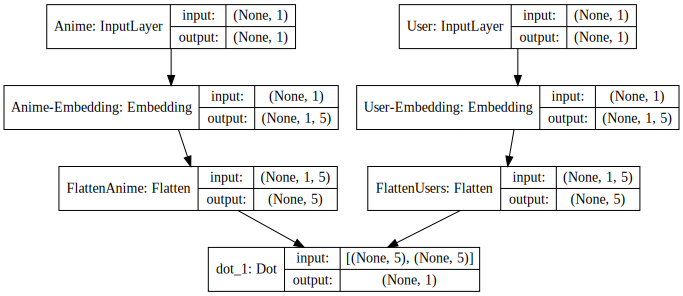

In [21]:

SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [20]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 5)         29270       Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         535090      User[0][0]                       
__________________________________________________________________________________________________
FlattenAni

In [21]:
history = model.fit([train.username, train.anime_id], train.my_score, epochs=10, verbose=1)

Epoch 1/10
24998875/24998875 [==============================] - 5706s 228us/step - loss: 21.7581
Epoch 2/10
24998875/24998875 [==============================] - 5767s 231us/step - loss: 13.0540
Epoch 3/10
24998875/24998875 [==============================] - 5672s 227us/step - loss: 12.8377
Epoch 4/10
24998875/24998875 [==============================] - 5656s 226us/step - loss: 12.7687
Epoch 5/10
24998875/24998875 [==============================] - 5628s 225us/step - loss: 12.5774
Epoch 6/10
24998875/24998875 [==============================] - 5617s 225us/step - loss: 12.3624
Epoch 7/10
24998875/24998875 [==============================] - 5622s 225us/step - loss: 12.2360
Epoch 8/10
24998875/24998875 [==============================] - 5609s 224us/step - loss: 12.1534
Epoch 9/10
24998875/24998875 [==============================] - 5604s 224us/step - loss: 12.1129
Epoch 10/10
24998875/24998875 [==============================] - 5587s 223us/step - loss: 12.0891


In [22]:
import h5py
h5py

<module 'h5py' from 'D:\\software\\Python36\\lib\\site-packages\\h5py\\__init__.py'>

In [1]:
import h5py
#model.save('model_em5_ep10')
from keras.models import load_model
model = load_model('model_full_em5_ep10.h5')

Using TensorFlow backend.


In [2]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model

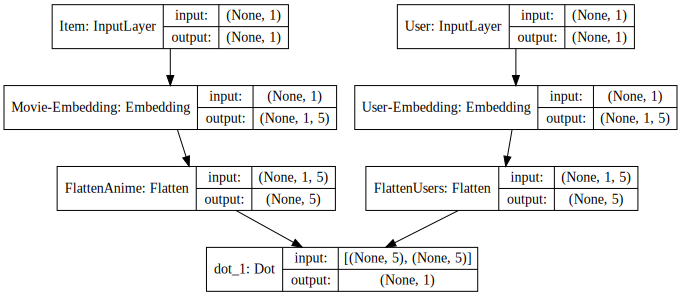

In [3]:
#import pydot
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [13]:
model.get_weights()[0]

array([[-1.22013378e+01, -1.01408310e+01,  7.01411343e+00,
        -7.02223969e+00, -1.22093525e+01],
       [-1.17706680e+01, -1.09850721e+01,  8.72091484e+00,
        -7.85982037e+00, -1.15235291e+01],
       [-7.82948065e+00, -7.88246250e+00,  6.50272179e+00,
         2.87612490e-02, -8.86226749e+00],
       ...,
       [-5.96496725e+00, -5.41665936e+00,  4.40015554e+00,
         3.50415993e+00, -5.88791084e+00],
       [-1.40165484e+00, -9.46261287e-01,  1.00774205e+00,
        -6.31614983e-01, -1.45546830e+00],
       [ 1.58278011e-02, -1.94534305e-02, -9.66404751e-03,
         1.40092634e-02, -2.70182136e-02]], dtype=float32)

In [11]:
len(model.get_weights()[0])

5854

In [25]:
y_hat_2 = model.predict([test.username, test.anime_id])

In [30]:
from sklearn.metrics import mean_squared_error
print( "MSE", mean_squared_error(test['my_score'], y_hat_2))
print("RMSE",np.sqrt(mean_squared_error(test['my_score'], y_hat_2)))

#print(mean_squared_error(test['rating'], model.predict([test.user_id, test.anime_id])))

MSE 12.21067718302593
RMSE 3.494377939351428


In [47]:
len(test.anime_id)

6249719

In [45]:
len(y_hat_2)

6249719

In [67]:
predicted_df =  pd.Series([i[0] for i in y_hat_2], index= test['username'].values)

In [68]:
test_df = pd.Series(test['my_score'].values,  index= test['username'].values)

In [77]:
ndcg_df = pd.concat({"true":test_df, "predicted":predicted_df}, axis= 1)

In [78]:
ndcg_df[:5]

,predicted,true
22027,6.028807,7
52392,8.416133,8
9718,10.076716,11
72193,9.288404,10
16659,8.081574,8


In [71]:
def ndcg(y_true, y_pred, k=None, powered=False):
    def dcg(scores, k=None, powered=False):
        if k is None:
            k = scores.shape[0]
        if not powered:
            ret = scores[0]
            for i in range(1, k):
                ret += scores[i] / np.log2(i + 1)
            return ret
        else:
            ret = 0
            for i in range(k):
                ret += (2 ** scores[i] - 1) / np.log2(i + 2)
            return ret
    
    ideal_sorted_scores = np.sort(y_true)[::-1]
    ideal_dcg_score = dcg(ideal_sorted_scores, k=k, powered=powered)
    
    pred_sorted_ind = np.argsort(y_pred)[::-1]
    pred_sorted_scores = y_true[pred_sorted_ind]
    dcg_score = dcg(pred_sorted_scores, k=k, powered=powered)
    
    return dcg_score / ideal_dcg_score

def ndcg1(y_true, y_pred, k=None):
    return ndcg(y_true, y_pred, k=k, powered=False)

def ndcg2(y_true, y_pred, k=None):
    return ndcg(y_true, y_pred, k=k, powered=True)

In [74]:
len(ndcg_df.index.unique())

106235

In [82]:
i = ndcg_df.index.unique()[0]

In [ ]:
ndcg_list=[]
for i in ndcg_df.index.unique():
    try:
        ndcg_list.append(ndcg1(ndcg_df.loc[i]["true"], ndcg_df.loc[i]["predicted"], k=10))
    except:
        print(i)

22027
52392
9718
72193
16659
99019
34418
87259
23142
73474
31765
45018
58325
46954
15191
95590
53392
31271
31076
73752
8056
37178
93007
49700
47093
101501
72781
32322
62740
76339
92326
32384
17250
11872
40020
65845
91607
30208
82760
38373
59946
79129
68013
79743
67362
100703
71121
101123
100088
30062
54229
803
20984
65086
73973
30942
14052
9448
7640
26121
14861
96429
73564
97161
44787
66029
24673
28860
65582
16959
25506
51105
105947
60267
77263
60912
81388
43348
61315
56936
39417
71060
2465
27452
73077
62167
57737
82055
13938
30681
70752
103505
63365
10828
59203
33661
95937
19494
22648
8740
69880
86585
63775
101210
87764
100124
15525
23466
54435
6576
38317
33587
42365
93935
61265
38362
59727
13338
54553
1373
52304
37956
12243
59604
9376
2143
85519
9652
37221
52388
24921
74978
42447
80789
67694
17428
23712
7492
73600
20666
58119
18885
14670
96646
72414
93870
18311
25396
90617
50465
55498
95197
27457
39114
9074
18897
85670
90782
29298
42022
22129
66582
3334
61397
79199
1846
106612
76751


D:\software\Python36\lib\site-packages\pandas\core\series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


51473
18718
32129
54228
78693
14676
55262
21828
26728
40541
12313
10690
58026
82753
59304
24471
29929
67183
105566
98535
7636
79497
83070
56359
78356
42926
99941
53276
63274
84649
56092
46308
28828
51175
83978
91877
72569
37846
8528
45780
44636
39835
105065
102537
94779
70042
80985
95488
59034
43642
106244
53227
62684
2173
105265
89443
5073
67152
94160
94057
67469
18713
52460
33932
95850
37150
28659
71697
85905
7981
7952
25643
89789
669
87554
41427
36385
42615
90741
90645
95987
31934
20567
103627
49192
4732
27503
34243
10120
29553
100245
55937
13918
104646
22522
18532
90726
40768
51289
53940
91040
92384
40054
43402
99837
3078
88890
39696
78836
53351
55873
77045
58261
36373
47809
42766
712
58592
46126
36773
15854
27506
47968
10803
70204
32278
91620
85020
89038
105438
56656
12535
38264
91780
97680
6280
6198
26075
13555
106434
76128
33765
76095
58623
29437
54744
29695
82803
36679
70567
35685
9339
93362
60715
82758
86865
103174
57897
90258
2412
33836
39019
22640
33256
16622
79337
55000
453

67137
93404
57462
35484
23593
44933
59117
1941
40927
99995
45714
67181
61866
104012
62048
92525
72839
32810
72155
31628
13757
101121
54510
15750
25241
36507
64775
71301
96592
16640
55356
39191
28616
72785
98528
42133
80106
3014
1396
58868
19715
35315
89736
81804
52948
26244
49880
57962
57407
69320
54086
62309
15153
28689
49426
96586
60214
54270
57735
19684
21150
69532
36666
94250
1963
87823
67680
20439
57890
50344
77057
27421
41482
87543
52737
49457
72111
30851
662
104838
80501
41039
83194
15973
28824
43055
5278
90842
1437
1441
89260
2811
9216
25051
99331
101886
77801
94916
24330
68698
37098
30480
65648
57371
104428
31751
33344
64199
89247
67997
36828
29168
93743
85120
95436
35725
20868
74625
54054
31179
84414
55207
26146
65130
2666
1489
39561
38006
27623
80716
104073
32638
16428
44530
106923
102755
44722
17425
101595
48071
84539
13796
91235
81716
17265
85373
490
66291
10406
13035
64994
74990
49054
11747
69133
58775
43650
21538
35158
34642
87982
44029
11258
13461
69903
83085
42981
2058

59668
8905
9509
42059
53708
85576
72579
637
42562
21982
48980
81586
78392
67378
46357
43605
61470
11481
104662


In [ ]:
ndcg_list = [i for i in ndcg_list if str(i) != 'nan']
mean(ndcg_list)

In [26]:
test.head()

,user_id,anime_id,rating
3507263,30705,7338,7
6499818,56894,5421,8
2973291,26101,2747,8
6058791,53802,19,8
1670131,15303,5691,9


In [25]:
type(train['user_id'][6977834])

numpy.int32

In [ ]:
df_anime_list= pd.read_csv()

In [21]:
## NNets

In [38]:
n_latent_factors_user = 5
n_latent_factors_movie = 8

movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors_movie, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
movie_vec = keras.layers.Dropout(0.2)(movie_vec)


user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input))
user_vec = keras.layers.Dropout(0.2)(user_vec)


concat = keras.layers.concatenate([movie_vec, user_vec], axis=-1)
concat_dropout = keras.layers.Dropout(0.2)(concat)
dense = keras.layers.Dense(200,name='FullyConnected')(concat)
dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1')(concat)
dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2')(dense_2)
dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)


result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
adam = Adam(lr=0.005)
model = keras.Model([user_input, movie_input], result)
model.compile(optimizer=adam,loss= 'mean_absolute_error')

In [39]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 8)         79424       Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         348005      User[0][0]                       
__________________________________________________________________________________________________
FlattenMov

In [ ]:
##train.user_id

In [40]:
history = model.fit([train.user_id, train.anime_id], train.rating, epochs=10, verbose=1)

Epoch 1/10
5069792/5069792 [==============================] - 1770s 349us/step - loss: 0.9788
Epoch 2/10
5069792/5069792 [==============================] - 1618s 319us/step - loss: 0.9339
Epoch 3/10
5069792/5069792 [==============================] - 965s 190us/step - loss: 0.9222
Epoch 4/10
5069792/5069792 [==============================] - 979s 193us/step - loss: 0.9154
Epoch 5/10
5069792/5069792 [==============================] - 8426s 2ms/step - loss: 0.9119
Epoch 6/10
5069792/5069792 [==============================] - 992s 196us/step - loss: 0.9092
Epoch 7/10
5069792/5069792 [==============================] - 969s 191us/step - loss: 0.9075
Epoch 8/10
5069792/5069792 [==============================] - 1010s 199us/step - loss: 0.9057
Epoch 9/10
5069792/5069792 [==============================] - 1003s 198us/step - loss: 0.9046
Epoch 10/10
5069792/5069792 [==============================] - 1026s 202us/step - loss: 0.9037


In [42]:
from sklearn.metrics import mean_absolute_error

In [44]:
print(mean_absolute_error(test['rating'], y_hat_2))

print(mean_absolute_error(test['rating'], model.predict([test.user_id, test.anime_id])))

0.8596266989835488
0.886770064226335
